# QDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [64]:
#%% Get dataset
data1 = pd.read_excel("Sujet1_artefact.xlsx",sheet_name=0,header=0,index_col=0)
X1=data1.dropna() #si j'ai de valeurs manquant je le suprimme

data2 = pd.read_excel("Sujet2_artefact.xlsx",sheet_name=0,header=0,index_col=0)
X2=data2.dropna() #si j'ai de valeurs manquant je le suprimme

data3 = pd.read_excel("Sujet3.xlsx",sheet_name=0,header=0,index_col=0)
X3=data3.dropna() #si j'ai de valeurs manquant je le suprimme

In [65]:
#%% Criação dos boxplots=
X=X1

bands = ['delta', 'theta', 'alpha', 'sigma', 'beta']

plt.figure(figsize=(12, 8))
 
# Removendo colunas que não queremos analisar
# Alvo -> classe = phase 

y = X['phase']
X = X[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
XX = X.drop(columns=['beta']) # no enunciado esta indicado
XX.describe()

#lda_1 = LinearDiscriminantAnalysis() # On veut projeter sur 2 axes pour visualiser
qda_1= QuadraticDiscriminantAnalysis()
X_qda_1 = qda_1.fit(XX, y)



<Figure size 1200x800 with 0 Axes>

In [66]:

X=X2

bands = ['delta', 'theta', 'alpha', 'sigma', 'beta']

plt.figure(figsize=(12, 8))

# Analyse Quadrqtrique
n,p=X.shape
# Removendo colunas que não queremos analisar
# Alvo -> classe = phase 

y = X['phase']
X = X[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
XX = X.drop(columns=['beta']) # no enunciado esta indicado
XX.describe()

#lda_1 = LinearDiscriminantAnalysis() # On veut projeter sur 2 axes pour visualiser
qda_2= QuadraticDiscriminantAnalysis()
X_qda_2 = qda_2.fit(XX, y)



<Figure size 1200x800 with 0 Axes>

In [67]:
X=X3

# Removendo colunas que não queremos analisar
# Alvo -> classe = phase 

y = X['phase']
X = X[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
XX = X.drop(columns=['beta']) # no enunciado esta indicado
XX.describe()

#lda_1 = LinearDiscriminantAnalysis() # On veut projeter sur 2 axes pour visualiser
qda_3= QuadraticDiscriminantAnalysis()
X_qda_3 = qda_3.fit(XX, y)



# 2.2 

Sujet1 - Accuracy: 0.796
Sujet1 - Balanced Accuracy: 0.686

Sujet2 - Accuracy: 0.822
Sujet2 - Balanced Accuracy: 0.672



ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (5).

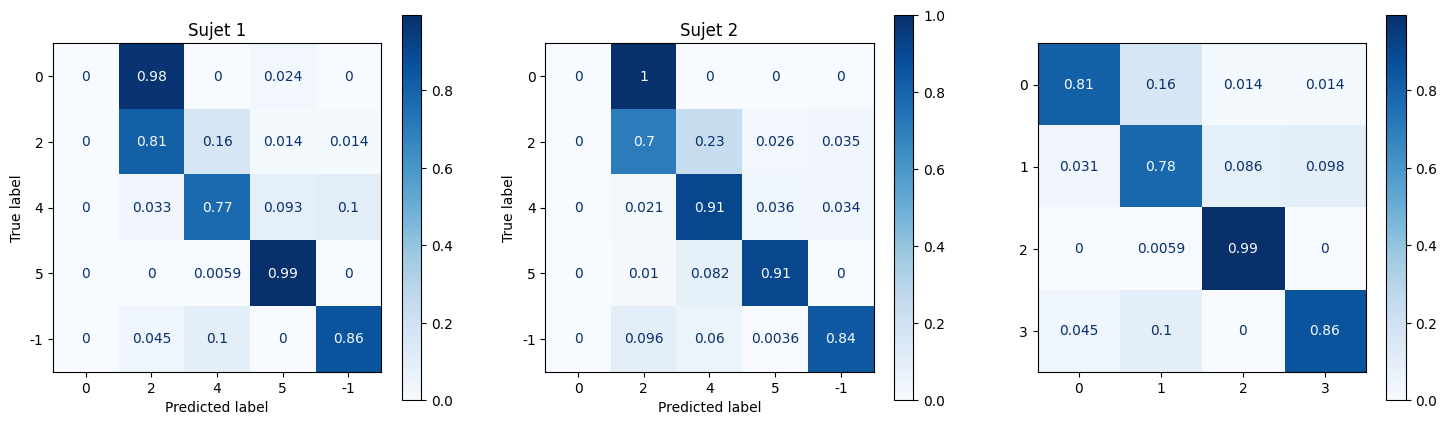

In [71]:
# IA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score
import matplotlib.pyplot as plt
# Inicializar QDA com regularização
qda_1 = QuadraticDiscriminantAnalysis(reg_param=0.1)
qda_2 = QuadraticDiscriminantAnalysis(reg_param=0.1)
qda_3 = QuadraticDiscriminantAnalysis(reg_param=0.1) # So garantindo que a matrzi seja inversivel(foizemso com IA, pois tava gerando warning)
# Listas de dados e modelos
datasets = [X1, X2, X3]
qdas = [qda_1, qda_2, qda_3]
labels = ['0', '2', '4', '5', '-1']

# Criar subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 linha, 3 colunas

for i, (data, qda) in enumerate(zip(datasets, qdas)):
    # Separar features e labels
    X_features = data[['delta', 'theta', 'alpha', 'sigma', 'puissance']]
    y_labels = data['phase']

    # Separar treino e validação
    X_train = X_features.iloc[0:420]
    y_train = y_labels.iloc[0:420]
    X_test = X_features.iloc[420:]
    y_test = y_labels.iloc[420:]

    # Treinar LDA
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred,normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues',ax=axes[i], colorbar=True)
    axes[i].set_title(f"Sujet {i+1}")

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Sujet{i+1} - Accuracy: {acc:.3f}")
    # Balanced accuracy
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    print(f"Sujet{i+1} - Balanced Accuracy: {bal_acc:.3f}\n")

plt.tight_layout()
plt.show()


In [ ]:
""""
Code du cours
"""
#%%
# fonction calculant la ddp de x avec m la moyenne et co la matrice de co variance
def densité_proba(m,co,x):
    ci=np.linalg.inv(co)
    det=np.sqrt(np.linalg.det(co))
    xt=np.reshape(x,(2,1))
    mt=np.reshape(m,(2,1))
    p=np.exp(-0.5*(x-m)@ci@(xt-mt))/(2*np.pi*det)
    return p

#%%
###################
# Calcul de la moyenne et de la matrice de covariance des 2 classes
# On trie les exemples de classe 0
# Se `data` for um array NumPy (7ª coluna -> índice 6)

#%% Séparer les données en ensembles d'apprentissage (420 premières lignes) et de test (reste)

data = pd.read_excel("Sujet2_artefact.xlsx",sheet_name=0,header=0,index_col=0)
data=data.dropna() #si j'ai de valeurs manquant je le suprimme
X_train = data.iloc[:420, 0:5]  # 420 premières lignes pour l'apprentissage
y_train = data['phase'][:420]

X_test = data.iloc[420:, 0:5]  # Reste pour le test
y_test = data['phase'][420:]

#%% Entraîner le modèle QDA sur l'ensemble d'apprentissage
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)
qda.fit(X_train, y_train)

#%% Prédire sur l'ensemble de test
y_pred = qda.predict(X_test)
y_proba = qda.predict_proba(X_test)


# Calculer l'accuracy et la balanced accuracy avec rejet
accuracy_original = accuracy_score(y_test, y_pred)
balanced_acc_original = balanced_accuracy_score(y_test, y_pred, adjusted=True)
print(f"Accuracy avec original : {accuracy_original:.4f}")
print(f"Balanced Accuracy avec original : {balanced_acc_original:.4f}")

Accuracy avec original : 0.7763
Balanced Accuracy avec original : 0.5401


In [131]:
# Calcul manuel des matrices de covariance et des moyennes pour QDA
classes = list(qda.classes_)  # Converter para lista
classes.append(-1)  # Classe para rejeição por distância
print(classes)
class_labels = ['0', '2', '4', '5','-1']
means = qda.means_
#%% Calcul des distances de Mahalanobis pour chaque point
data = pd.read_excel("Sujet2_artefact.xlsx",sheet_name=0,header=0,index_col=0)
def mahalanobis_distance(x, mean, cov):
    cov_inv = np.linalg.inv(cov)  # Inverser la matrice de covariance
    diff = x - mean
    dist = np.sqrt(np.dot(np.dot(diff, cov_inv), diff.T))
    return dist
# Calcul des covariances pour chaque classe
covariances = []
for i, class_label in enumerate(classes):
    X_class = X_train[y_train == class_label].iloc[:, 0:5]
    covariance = np.cov(X_class, rowvar=False)
    covariances.append(covariance)

# Calcul des distances de Mahalanobis pour chaque point de test
distances = []
for i, row in X_test.iterrows():
    class_distances = []
    for j, class_mean in enumerate(means):
        dist = mahalanobis_distance(row, class_mean, covariances[j])
        class_distances.append(dist)
    distances.append(min(class_distances))  # Distance minimale parmi les classes
# Appliquer les rejets sur les prédictions
#%% Rejet en ambiguïté et en distance
# Définir les seuils
from sklearn.metrics import accuracy_score

best_acc = 0
best_distance = None
best_proba = None

# Testar vários valores possíveis
for distance_threshold in np.arange(1,50,0.5):
    for proba_threshold in np.arange(0.1,1.01,0.01):
        y_pred_reject = []
        for i in range(len(y_pred)):
            if distances[i] > distance_threshold:
                y_pred_reject.append(-1)
            elif proba_threshold >= max(y_proba[i]) :
                y_pred_reject.append(-1)
            else:
                y_pred_reject.append(y_pred[i])
        # Calcular acurácia apenas para não rejeitados

        acc = accuracy_score(y_test, y_pred_reject)
        if acc > best_acc:
            best_acc = acc
            best_distance = distance_threshold
            best_proba = proba_threshold

print(f"Melhor accuracy: {best_acc:.4f} com distance_threshold={best_distance} e proba_threshold={best_proba:.2f}")




[0, 2, 4, 5, -1]


/opt/homebrew/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/var/folders/rk/dysxg_n95dj298tmpfpz545r0000gn/T/ipykernel_48773/3518084526.py:18: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariance = np.cov(X_class, rowvar=False)
/opt/homebrew/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/homebrew/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Melhor accuracy: 0.7763 com distance_threshold=8.0 e proba_threshold=0.10


Original : accuracy=0.7763, balanced accuracy=0.5401
Reject : accuracy=0.7723, balanced accuracy=0.5635


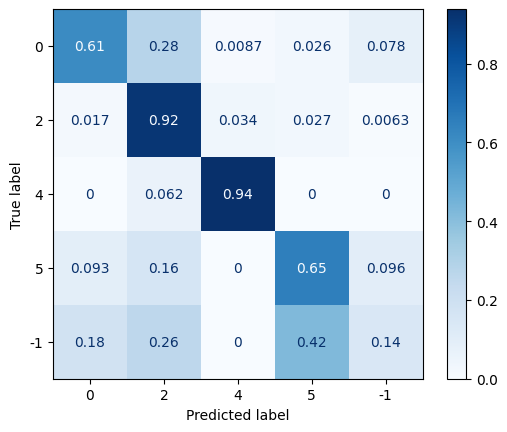

In [ ]:
distance_threshold = 8 # Seuil de distance pour le rejet
proba_threshold = 0.5 # Seuil de probabilité pour le rejet en ambiguïté

# Appliquer les rejets sur les prédictions
y_pred_reject = []
for i in range(len(y_pred)):
    # Rejet en distance
    if distances[i] > distance_threshold:
        y_pred_reject.append(-1)
    # Rejet en ambiguïté
    elif max(y_proba[i]) <= proba_threshold:
        y_pred_reject.append(-1)
    else:
        y_pred_reject.append(y_pred[i])

# # Calcular acurácia apenas para não rejeitados
# mask = np.array(y_pred_reject) >= 0
# accuracy_reject = accuracy_score(y_test[mask], np.array(y_pred_reject)[mask])
# balanced_acc_reject = balanced_accuracy_score(y_test, y_pred_reject, adjusted=True)
#%% Calculer la nouvelle matrice de confusion avec rejet

# precisa tirar o -1 para calcular 
cm_reject = confusion_matrix(y_test, y_pred_reject, labels=[0, 2, 4, 5, -1], normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_reject, display_labels=labels)
disp.plot(cmap='Blues', colorbar=True)

# Calculer l'accuracy et la balanced accuracy avec rejet
accuracy_reject = accuracy_score(y_test, y_pred_reject)
balanced_acc_reject = balanced_accuracy_score(y_test, y_pred_reject, adjusted=True)
print(f"Original : accuracy={accuracy_original:.4f}, balanced accuracy={balanced_acc_original:.4f}")
print(f"Reject : accuracy={accuracy_reject:.4f}, balanced accuracy={balanced_acc_reject:.4f}")



/var/folders/rk/dysxg_n95dj298tmpfpz545r0000gn/T/ipykernel_48773/2449170422.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', len(label_values))


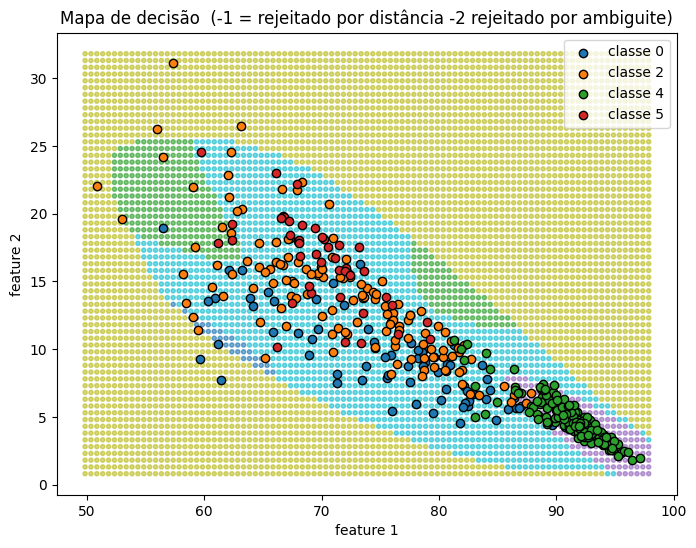

In [ ]:
# ...existing code...
#%% Tracé des frontières corrigé (classes 0,2,4,5, -1 = rejeitado por distância, -2 rejeitado por ambiguite)
from scipy.stats import multivariate_normal

# Referência de features 2D (usar X_train se existir)
try:
    X_ref = X_train.iloc[:, :2].to_numpy()
    y_ref = y_train.to_numpy()
except NameError:
    # fallback para o caso de 'data' estar definido como DataFrame
    X_ref = data.iloc[:420, :2].to_numpy()
    y_ref = data['phase'][:420].to_numpy()

# classes esperadas (por exemplo [0,2,4,5])
classes = np.unique(y_ref)

# calcular médias, covariâncias e priors a partir do conjunto de treino
means = np.array([X_ref[y_ref == c].mean(axis=0) for c in classes])
covariances = [np.cov(X_ref[y_ref == c].T) for c in classes]
priors = np.array([np.mean(y_ref == c) for c in classes])

# grid para o mapa
xmin, xmax = X_ref[:,0].min() - 1, X_ref[:,0].max() + 1
ymin, ymax = X_ref[:,1].min() - 1, X_ref[:,1].max() + 1
xx = np.arange(xmin, xmax, 0.5)
yy = np.arange(ymin, ymax, 0.5)

trace = []
certain = 0.80   # limiar de certeza para atribuir classe
dist = 0.0001    # limiar de densidade para rejeitar por distância

for xi in xx:
    for yj in yy:
        pt = np.array([xi, yj])
        # densidades condicionais ponderadas por priors
        p_c = np.array([priors[i] * multivariate_normal.pdf(pt, mean=means[i], cov=covariances[i], allow_singular=True)
                        for i in range(len(classes))])
        p_total = p_c.sum()
        if p_total <= dist:
            label = -1                       # rejeitado por distância
        else:
            post = p_c / p_total
            idx = np.argmax(post)
            if post[idx] > certain:
                label = int(classes[idx])    # classe atribuída (0,2,4,5)
            else:
                label = -2                   # indefinida -> reject
        trace.append([xi, yj, label])

trace = np.array(trace)

# mapear rótulos para índices de cor (manter -1 como última cor)
label_values = list(classes) + [-1] + [-2]
label_to_idx = {lab: i for i, lab in enumerate(label_values)}
color_idxs = np.vectorize(lambda v: label_to_idx.get(int(v), label_to_idx[-1]))(trace[:,2].astype(int))

cmap = plt.cm.get_cmap('tab10', len(label_values))
plt.figure(figsize=(8,6))
plt.scatter(trace[:,0], trace[:,1], c=color_idxs, cmap=cmap, marker='.', alpha=0.6)

# plot dos pontos de treino sobrepostos
for cls in classes:
    pts = X_ref[y_ref == cls]
    plt.scatter(pts[:,0], pts[:,1], label=f'classe {int(cls)}', edgecolor='k')

# legenda para reject
plt.scatter([], [], c=[cmap(label_to_idx[-1])], marker='s')
plt.legend()
plt.title('Mapa de decisão  (-1 = rejeitado)')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()
# ...existing code...